# User Car Price Modeling

## Exercise Overview and Context

In this notebook, we are inspecting, analyzing, and modeling the price of used cars. Through this exercise, we will understand the important factors that determine the price of a used car and how we can apply these learnings to make an overall impact to the business. In the notebook below, I am following the CRISP-DM methodology with sections clearly outlined. This is also supplemented by a README doc which includes setup, a summarized report, and final take-aways.

**References**
- [Assignment Page](https://classroom.emeritus.org/courses/3424/assignments/171432?module_item_id=1170720)
- [CRISP-DM Review](https://www.datascience-pm.com/crisp-dm-2/)


**TODO**
- Outlier Removal - Quartile Rank?
- one-hot encoding on categorical values
- remove vin
- feature description


## Business Understanding

The Business Understanding phase has four sections:
1. Determine Business Objectives
2. Assess Situation
3. Determine Data Mining Goals
4. Produce Project Plan

Each of these sections are outlined in cells below:

**Business Objectives:**
- Determine factors that influence the price of used cars
- To provide recommendations on what customers to focus for the purpose of marketing
- to provide recommendations on what features to focus on for the purpose improving sales

**Current Situation**
- Available data is a dataset includes 426K rows with relevant information
- Timeline is approximately 1 week to complete assessment and report
- Overall this is a low-risk exercise. A failure to complete this assessment will have little impact to the company. However, a successful assessment will have a positive impact to future sales and growth.


**Data Mining (or Technical) Goals**
- To predict the price of a used car
- To understand the features that affect the price of a used car
- To obtain the best model for predicting the price of a used car
- To obtain a relatively accurate model for predicting the price of a used car

**Project Plan**
1. [Day 1] Obtain Data and Conduct Exploratory Data Analysis
2. [Day 1] Preprocess and Clean Data
3. [Day 1] Build and Train Model
4. [Day 2] Evaluate Model and Potentially Adjust Model as needed
5. [Day 2] Prepare Results and Report
6. [Day 3] Report to Stakeholders and Business Owners
7. [Day 4+] Enact recommendations from exercise

## Data Understanding

In understanding the data, there are four main goals:
1. Collect data
2. Describe data
3. Explore data
4. Verify data quality

The cells below address each one of these areas starting with library imports

### Import libraries

In [11]:
# Data Handling
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor

from warnings import filterwarnings
filterwarnings('ignore')
# from lazypredict.Supervised import LazyRegressor

### Collect Data

In [2]:
drive_path = './data/vehicles.csv'
df = pd.read_csv(drive_path)

### Describe data

In [3]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [4]:
df['type'].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [7]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [8]:
# Print number of unique values for object type columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}: {df[col].nunique()}')

region: 404
manufacturer: 42
model: 29649
condition: 6
cylinders: 8
fuel: 5
title_status: 6
transmission: 3
VIN: 118246
drive: 3
size: 4
type: 13
paint_color: 12
state: 51


#### Feature Description
|  Name | Description |
| ------------ | ----------- |
| id | Id or index of the dataset|
| region | Region where transaction occurred (typically a city or metropolitan statistical area) |
| price | Pirce of the used car when the transaction took place |
| year | Year car was manufactured |
| manufacturer | Manufacturer of the car (Ford, Toyota, etc) |
| model | Model of the car (Silverado, Carolla, etc) |
| condition | New, used, etc |
| cylinders | Number of cylinders |
| fuel | Energy source (gas, diesel, electric, etc) |
| odometer | How many miles on car at transaction |
| title_status | Current status of the title |
| transmission | Transmission type (manual, auto, etc) |
| VIN | Vehicle Identifcation Number |
| drive | Wheel power (or drive) (4wd, rear, etc) |
| size | Cabin size of Car |
| type | General class of car (truck, van, etc) |
| paint_color | Color of paint (silver, black, etc) |
| state | US State (Alabama, California, etc) |




### Explore Data

In [9]:
# Below are helper functions for plotting categorical variables in seaborn

def plot_categorical_vs_price(df, col, target, figsize=(12,10), raw_bool=True, display=False):
    """
    Creates a bar plot for a categorical variable and a target variable

    Args:
        df (pd.DataFrame): Pandas DataFrame
        col (str): Column name of categorical variable
        target (str): Column name of target variable
        figsize (tuple, optional): Figure size. Defaults to (12,10).
        raw_bool (bool, optional): If True, saves figure as raw data. Defaults to True.
        display (bool, optional): If True, displays plot. Defaults to False.

    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=figsize)
    if df[col].nunique() > 50:
        sns.barplot(x=col, y=target, data=df, palette="mako", alpha=0.75, ax=ax, order=df[col].value_counts().iloc[:50].index)
    else:
        sns.barplot(x=col, y=target, data=df, palette="mako", alpha=0.75, ax=ax, order=df[col].value_counts().index)
    ax.set_title(f'{target.capitalize()} by {col.capitalize()}')
    plt.xticks(rotation=90)
    plt.tight_layout()

    if raw_bool:
        plt.savefig(f'./images/report_images/{col}_v_{target}_raw.png', bbox_inches="tight")
    else:
        plt.savefig(f'./images/report_images/{col}_v_{target}_clean.png', bbox_inches="tight")

    if display:
        plt.show()
    plt.close()


def plot_categorical_count(df, col, figsize=(12,10), raw_bool=True, display=False):
    """
    Creates a count plot for a categorical variable

    Args:
        df (pd.DataFrame): Pandas DataFrame
        col (str): Column name of categorical variable
        figsize (tuple, optional): Figure size. Defaults to (12,10).
        raw_bool (bool, optional): If True, saves figure as raw data. Defaults to True.
        display (bool, optional): If True, displays plot. Defaults to False.

    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Limit to top 50 values (useful for columns with many unique values like model)
    if df[col].nunique() > 50:
        sns.countplot(x=col, data=df, palette="mako", alpha=0.75, ax=ax, order=df[col].value_counts().iloc[:50].index)
    else:
        sns.countplot(x=col, data=df, palette="mako", alpha=0.75, ax=ax, order=df[col].value_counts().index)

    # Plot formatting
    ax.set_title(f'Count of {col.capitalize()}')
    plt.xticks(rotation=90)

    if raw_bool:
        plt.savefig(f'./images/report_images/{col}_count_raw.png', bbox_inches="tight")
    else:
        plt.savefig(f'./images/report_images/{col}_count_clean.png', bbox_inches="tight")

    if display:
        plt.show()
    plt.close()


#### Categorical Features

The goal here is to plot each categorical feature and then review the distribution as well as it's affect on price. 

For brevity, most plots are not displayed here but are saved in the report_images directory. Some plots are displayed here for visibility/discussion sake.

In [12]:
# Plotting categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        plot_categorical_count(df, col)
        plot_categorical_vs_price(df, col, 'price')

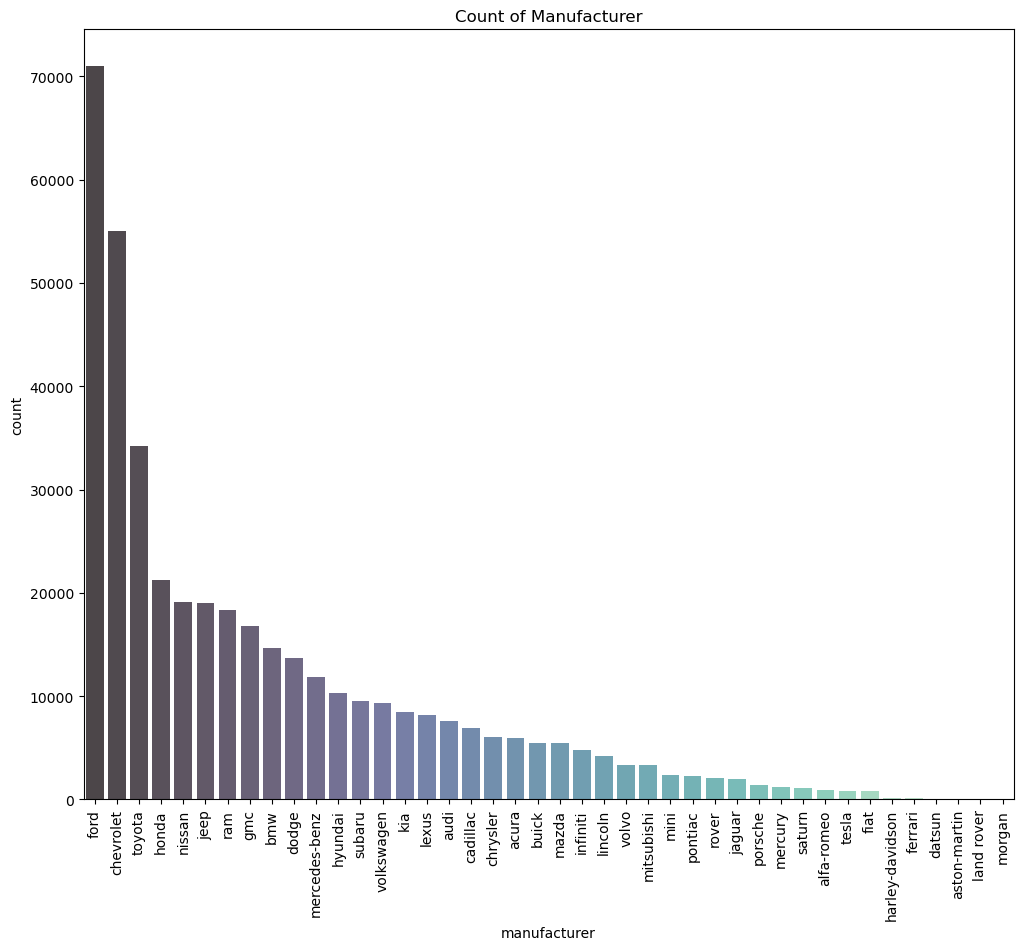

In [13]:
plot_categorical_count(df, 'manufacturer', figsize=(12,10), display=True)

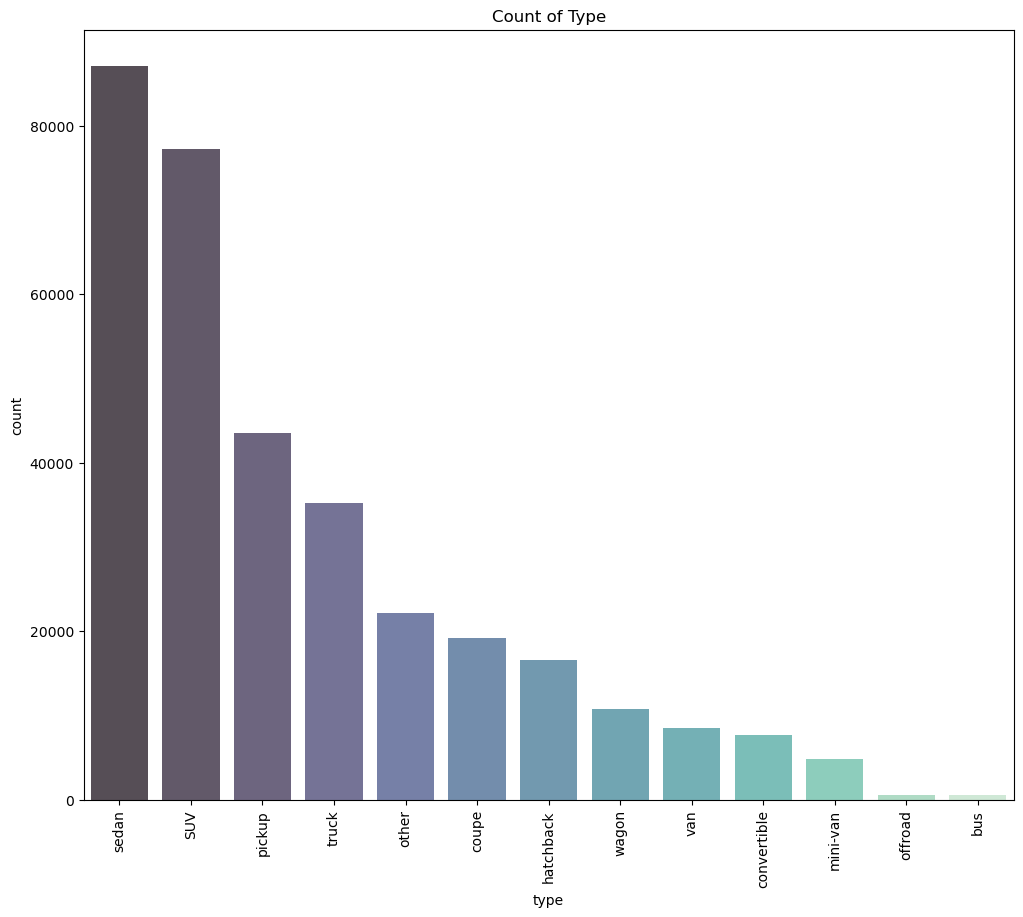

In [14]:
plot_categorical_count(df, 'type', figsize=(12,10), display=True)

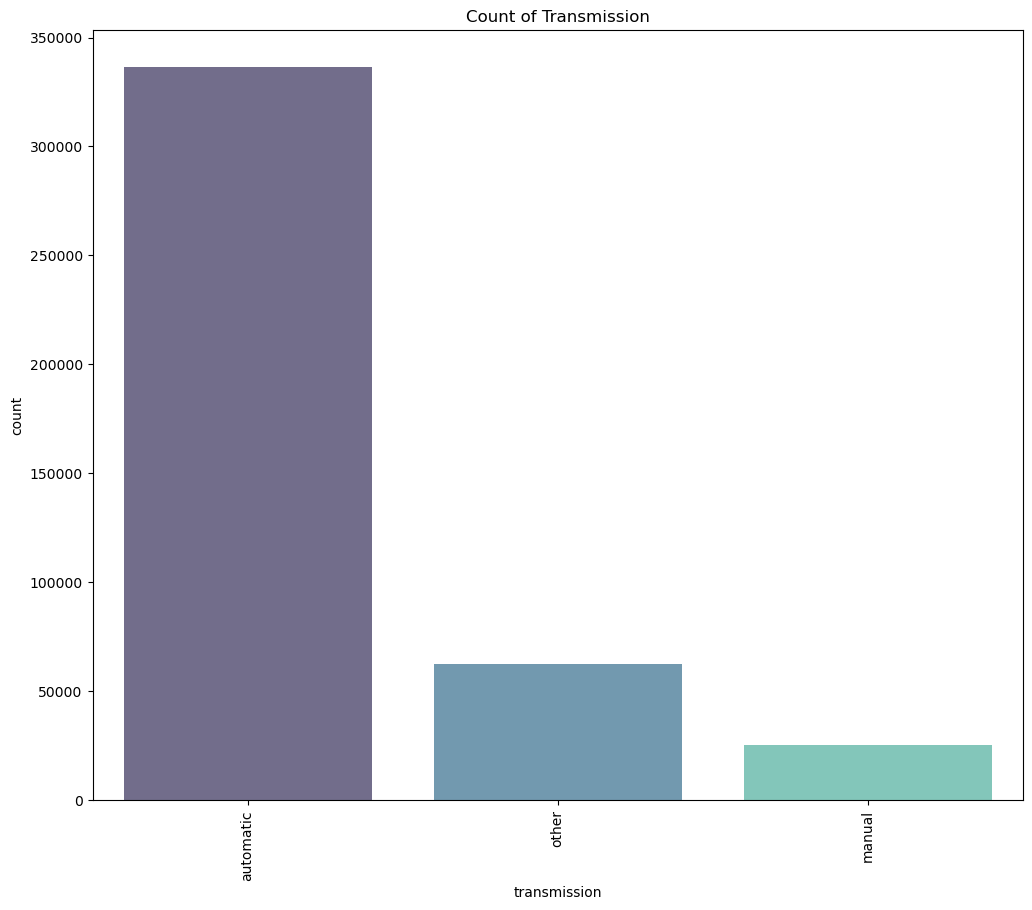

In [15]:
plot_categorical_count(df, 'transmission', figsize=(12,10), display=True)

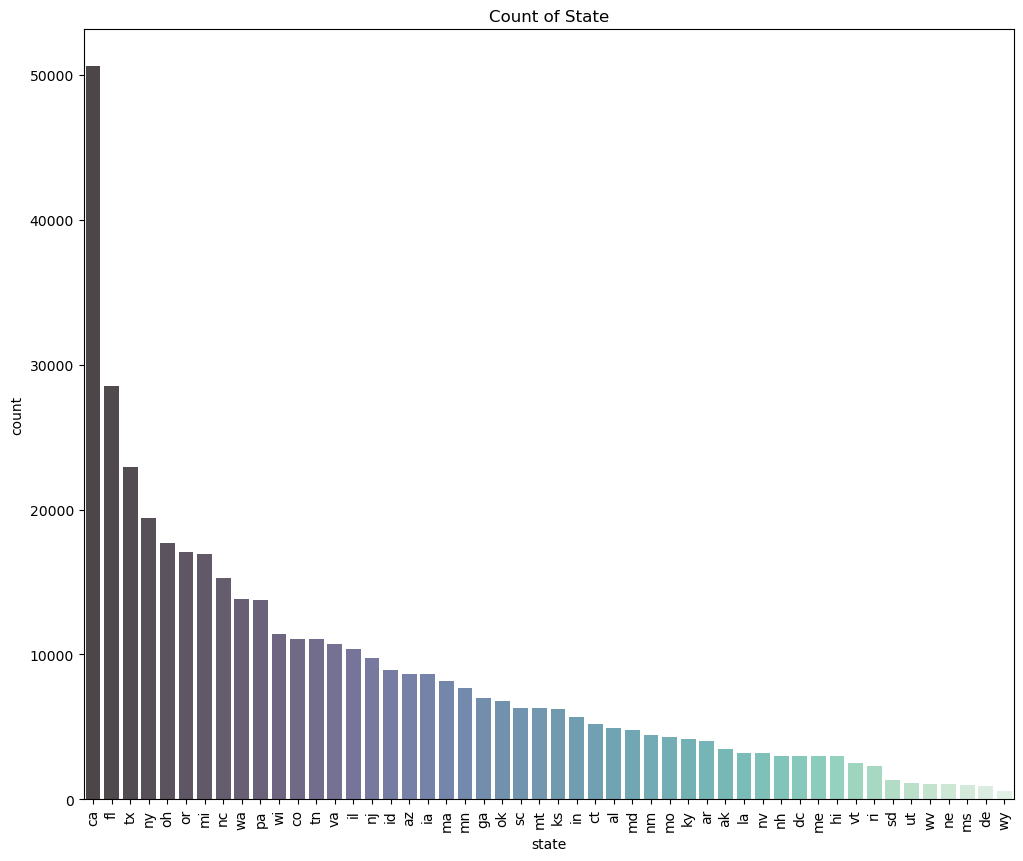

In [16]:
plot_categorical_count(df, 'state', figsize=(12,10), display=True)

#### Continuous Features

In [17]:
# Below are helper functions for plotting numerical/continuous variables in seaborn
def plot_numerical_vs_price(df, col, target, figsize=(12,10), raw_bool=True, display=False):
    """
    Plots a scatter plot for a numerical variable and a target variable
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(x=col, y=target, data=df, palette="mako", alpha=0.75, ax=ax)
    ax.set_title(f'{target.capitalize()} by {col.capitalize()}')
    plt.xticks(rotation=90)
    plt.tight_layout()

    if raw_bool:
        plt.savefig(f'./images/report_images/{target}_by_{col}_raw.png', bbox_inches="tight")
    else:
        plt.savefig(f'./images/report_images/{target}_by_{col}_clean.png', bbox_inches="tight")
    if display:
        plt.show()
    plt.close()


In [18]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and col not in ['price', 'id']:
        plot_numerical_vs_price(df, col, 'price')

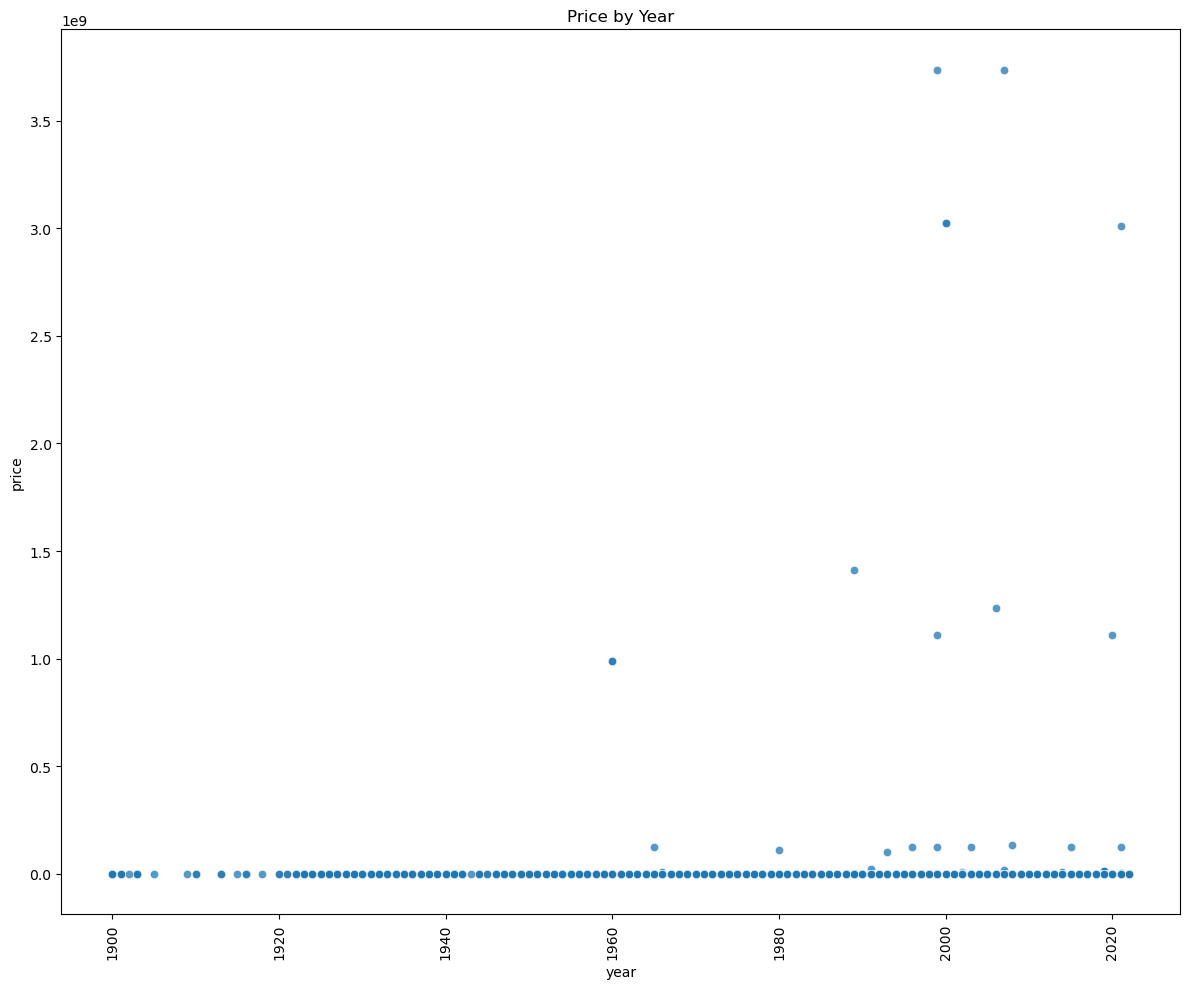

In [19]:
# This chart shows that outliers are present in the data and skewing charts/data
plot_numerical_vs_price(df, 'year', 'price', display=True)

#### EDA Conclusions
Upon initial review, I have a few thoughts on the dataset:
- The dataset seems to be skewed towards sedans and pickups
- The dataset seems to be skewed towards american, and japanese car manufacturers
- The dataset seems to be skewed towards automatic transmission
- The dataset seems to mirror US population in that more populous states have more data with the majority coming from California
- It appears that several outliers are skewing the data / charts. Outlier removal will be required


### Data Quality

After completing the initial exploratory data analysis, some minor data quality isses were discovered. Namely, we need to remove null or NA values as well as complete outlier removal


## Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

The approach to preparing the data is the following:
- Begin with outlier removal and then remove additional rows/columns that do not contain useful data
- Remove cols with significant null values
- Remove rows with nulls
- Conduct one-hot encoding on categorical columns
- Scale/normalize as needed

#### Outlier Removal

In [20]:
# Outlier Removal using IQR
# I am doing outlier removal on the price, year, and odometer columns

def remove_outliers(df, cols, lower_bound=None, upper_bound=None):
    """
    Removes outliers from a column in a DataFrame using IQR

    Args:
        df (pd.DataFrame): Pandas DataFrame
        col (str): Column name of numerical variable
        lower_bound (float, optional): Lower bound for outliers. Defaults to None.
        upper_bound (float, optional): Upper bound for outliers. Defaults to None.

    Returns:
        pd.DataFrame: Pandas DataFrame with outliers removed
    """
    for col in cols:
        if lower_bound is None:
            lower_bound = df[col].quantile(0.02) - (1.5 * (df[col].quantile(0.98) - df[col].quantile(0.02)))
        if upper_bound is None:
            upper_bound = df[col].quantile(0.98) + (1.5 * (df[col].quantile(0.98) - df[col].quantile(0.02)))

        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [21]:
df_processed_1 = remove_outliers(df, ['price', 'year', 'odometer'])
print(f"Original count: {len(df.index)} | Cleaned count: {len(df_processed_1.index)}")

Original count: 426880 | Cleaned count: 331112


These charts below demonstrate a more 'expected' / non-skewed dataset after outlier removal

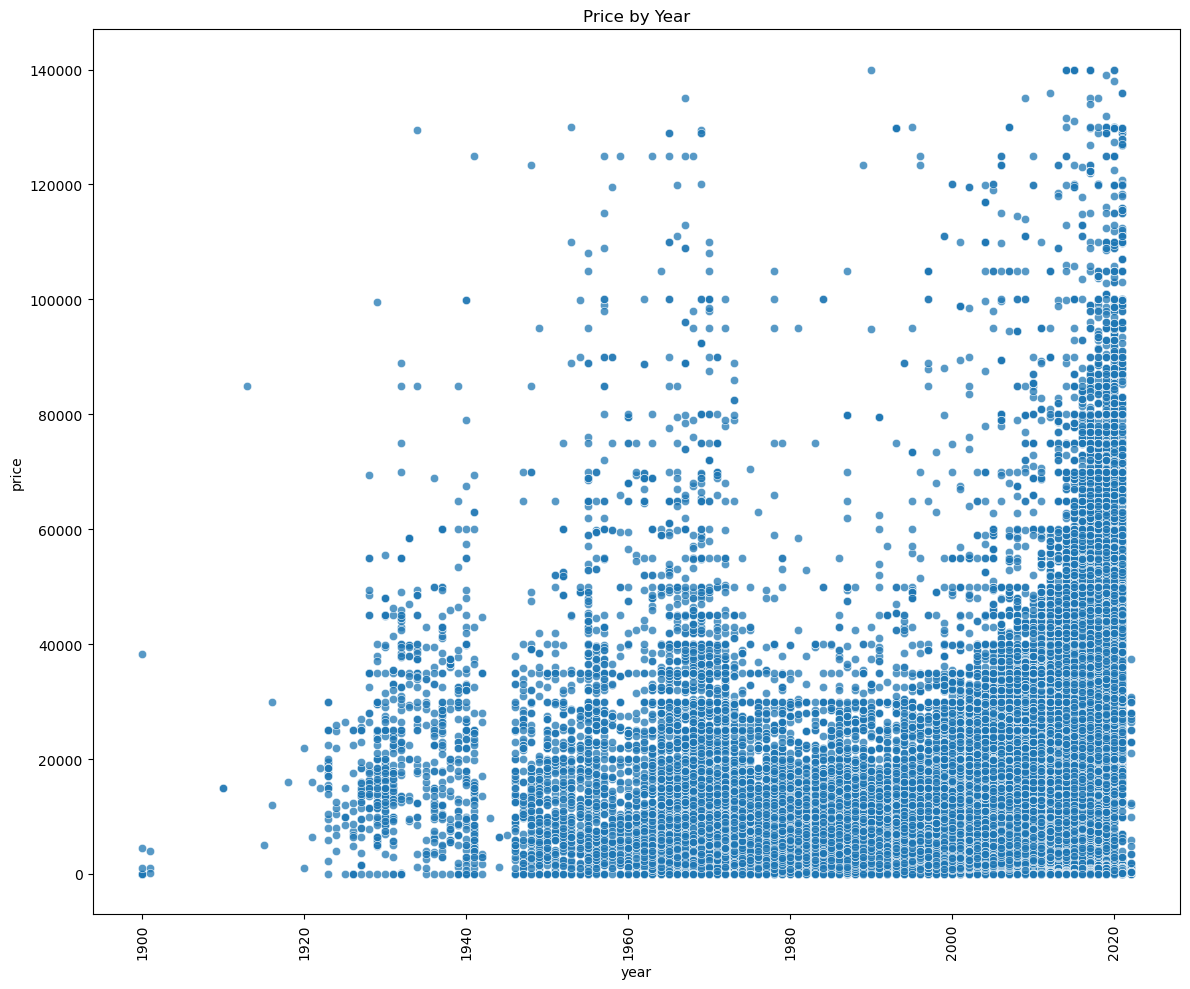

In [22]:
plot_numerical_vs_price(df_processed_1, 'year', 'price', raw_bool=False, display=True)

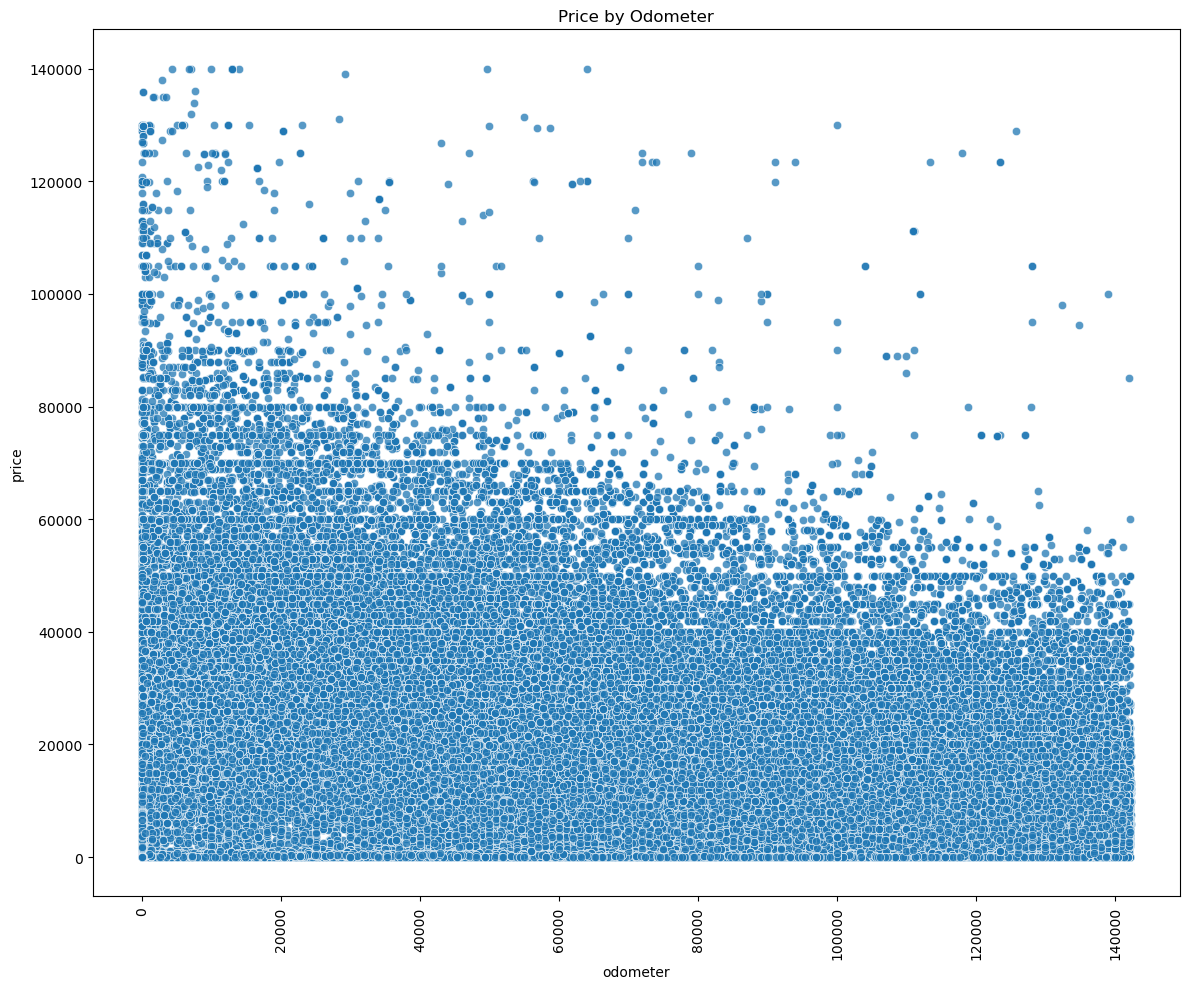

In [23]:
plot_numerical_vs_price(df_processed_1, 'odometer', 'price', raw_bool=False, display=True)

In [24]:
# Replotting charts after outlier removal
for col in df_processed_1.columns:
    if df_processed_1[col].dtype == 'object':
        plot_categorical_count(df_processed_1, col, raw_bool=False)
        plot_categorical_vs_price(df_processed_1, col, 'price', raw_bool=False)

for col in df_processed_1.columns:
    if df_processed_1[col].dtype in ['int64', 'float64'] and col not in ['price', 'id']:
        plot_numerical_vs_price(df_processed_1, col, 'price', raw_bool=False)

After outlier removal, several of the features and plots make more sense. An example of this can be seen below in the paint vs price charts

![Paint Raw](./images/report_images/paint_color_v_price_raw.png "Paint Raw")

![Paint Clean](./images/report_images/paint_color_v_price_clean.png "Paint Clean")

#### Removal of columns and rows

In [31]:
df_processed_2 = df_processed_1.copy()
df_processed_2 = df_processed_2.drop(columns=['VIN', 'size', 'model', 'region'])
df_processed_2 = df_processed_2.dropna()  # This removes a lot, maybe revisit
print(f"Original Count: {len(df.index)} | Cleaned Count: {len(df_processed_2.index)}")

Original Count: 426880 | Cleaned Count: 84868


## Modeling

In this section, I used multiple regression models followed by cross-validation. Once a model is selected, hyperparameters are tuned through a grid search. Finally coefficients and evaluation metrics are analyzed and discussed.

### Model Evaluation

To evaluate the models, I used four metrics:
1. Root-Mean-Squared-Error: measures the average magnitude of the residuals or errors between the predicted and actual values
2. R-Squared: proportion of the variance for the dependent variable that's explained by the independent variables
3. Mean-Absolute-Error: measures the average magnitude of the errors in a set of predictions, without considering their direction
4. Mean-Squared-Error:  measures the average over the test sample of the squared differences between prediction and actual observation

I included four here to have additional data and metrics to evaluate the models, however, the primary metric is **RMSE**. RMSE is useful here as it penalizes large errors (because it squares before it averages) which is good as we do not want extreme large errors in our prediction. This could lead to larger losses by the business should they price a used car incorrectly.  


In [32]:
# Store scores per model
model_scores = pd.DataFrame(columns=['Model', 'R2', 'RMSE', 'MAE', 'MSE'])

In [58]:
# Helper functions for preprocessing and modeling

# NOTE, I did not use the sklearn pipeline as I needed to process the data
# prior to one-hot encoding so that all features were included. This ensured
# the training and testing data has the same shape and all unique values 
# were encoded in each dataset

def polyFeatures(df, numerical_cols):
    poly = PolynomialFeatures(2)
    df_pf = poly.fit_transform(df[numerical_cols])
    df_pf = pd.DataFrame(df_pf, columns=poly.get_feature_names_out())
    df_pf['id'] = pd.Series(df['id'].values)
    return df_pf

def ohe(df, categorical_cols):
    if len(categorical_cols) > 0:
        df_ohe = pd.get_dummies(df, columns=categorical_cols)
    else:
        df_ohe = df
    return df_ohe

def model_fit_summary(model, df, target_col, model_name, display=True):
    # Preprocess column transformer
    categorical_columns = df.select_dtypes(include='object').columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    numerical_columns = numerical_columns.drop(target_col)
    if 'id' in numerical_columns:
      numerical_columns = numerical_columns.drop('id')

    all_cols = list(numerical_columns)+list(categorical_columns)

    print(f"Numerical columns: {numerical_columns}")
    print(f"Categorical columns: {categorical_columns}")
    print(f"Columns: {all_cols}")

    df_1 = polyFeatures(df, numerical_columns)
    df_2 = ohe(df, categorical_columns)
    df_combined = pd.merge(df_2, df_1, on="id")
    scaler = MinMaxScaler()
    final_df = pd.DataFrame(scaler.fit_transform(df_combined), columns=df_combined.columns)

    # Train, test split
    X = final_df.drop(columns=target_col)
    y = final_df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.1)

    # Fit model
    model.fit(X_train, y_train)
    print('Data fit')

    # Predict
    y_pred = model.predict(X_test)

    try:
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        model_scores.loc[len(model_scores.index)] = [model_name, r2, rmse, mae, mse]

        print(f"R2:\t {round(r2,4)}")
        print(f"RMSE:\t {round(rmse,4)}")
        print(f"MAE:\t {round(mae,4)}")
        print(f"MSE:\t {round(mse,4)}")
        
    except:
        print("Could not calculate metrics")

    # Print coefficients and intercept if exists
    try:
        print(f"Intercept: {model.intercept_}")
        coef = model.coef_
        print(f"Coefficients (top 10): {coef[:10]}")
    except:
        pass

    if display:
        _, ax = plt.subplots(figsize=(8,5))
        disp = PredictionErrorDisplay.from_predictions(
            y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.75})
        ax.set_title(f'Model Performance')
        plt.tight_layout()
        plt.savefig(f'./model_{model_name}_performance.png', bbox_inches="tight")
        plt.show()
        plt.close()
    return model, final_df


### Models to Evaluate

In [52]:
# Linear Regression
lr_model = LinearRegression(fit_intercept=True)

# Random Forest Regression w/ Grid Search
rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [10, 20, 30],        
    'min_samples_split': [2, 5, 10]   
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Ridge Regression
alphas = np.logspace(-10, 10, 100)  # alpha values to be chosen from by cross-validation
r_model = TransformedTargetRegressor(
    regressor=RidgeCV(alphas=alphas)
)

# Lasso Regression
alphas = np.logspace(-10, 10, 100)  # alpha values to be chosen from by cross-validation
l_model = TransformedTargetRegressor(
    regressor=LassoCV(alphas=alphas)
)


Numerical columns: Index(['year', 'odometer'], dtype='object')
Categorical columns: Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')
Columns: ['year', 'odometer', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
Data fit
R2:	 0.5866
RMSE:	 0.0653
MAE:	 0.0412
MSE:	 0.0043
Intercept: 897739998556.1842
Coefficients (top 10): [-5.37976456e-03  5.67351223e+10 -1.60483999e+11  1.48790776e+10
  1.48790776e+10  1.48790776e+10  1.48790776e+10  1.48790776e+10
  1.48790776e+10  1.48790776e+10]


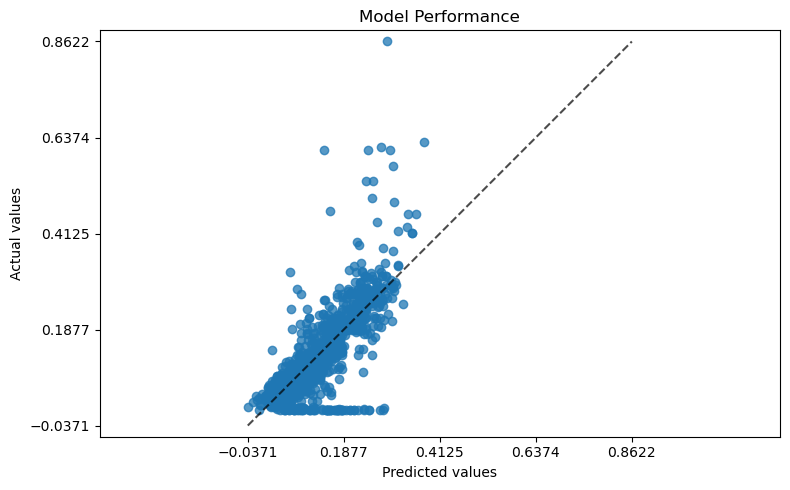

In [59]:
lr_model_final, lr_df = model_fit_summary(lr_model, df_processed_2, 'price', 'LinearRegression')

Numerical columns: Index(['year', 'odometer'], dtype='object')
Categorical columns: Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')
Columns: ['year', 'odometer', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  57.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  57.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  57.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  57.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time= 1.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time= 1.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators

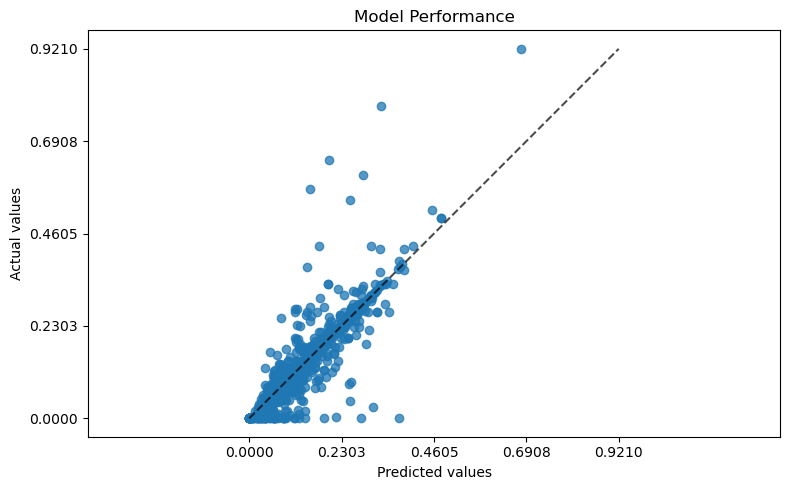

In [41]:
rf_model_final, rf_df = model_fit_summary(grid_search, df_processed_2, 'price', 'RandomForestRegressor')

Numerical columns: Index(['year', 'odometer'], dtype='object')
Categorical columns: Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')
Columns: ['year', 'odometer', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
Data fit
R2:	 0.5868
RMSE:	 0.0653
MAE:	 0.0412
MSE:	 0.0043


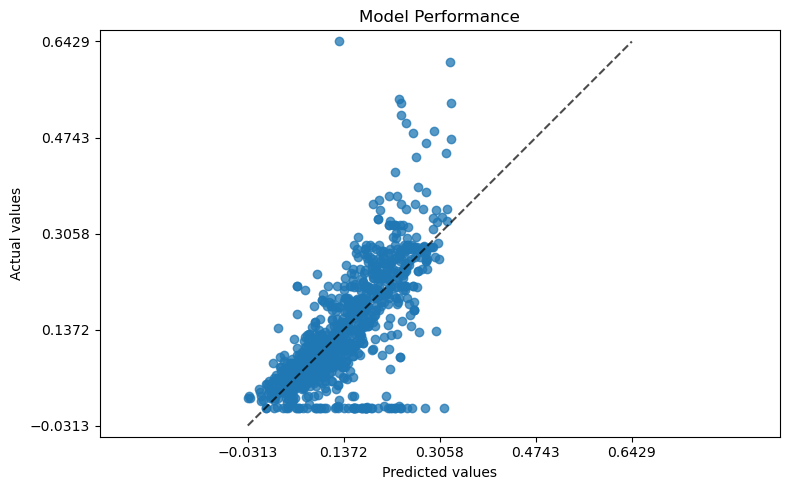

In [42]:
r_model_final, r_df = model_fit_summary(r_model, df_processed_2, 'price', 'Ridge')

Numerical columns: Index(['year', 'odometer'], dtype='object')
Categorical columns: Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')
Columns: ['year', 'odometer', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
Data fit
R2:	 0.5331
RMSE:	 0.0694
MAE:	 0.045
MSE:	 0.0048


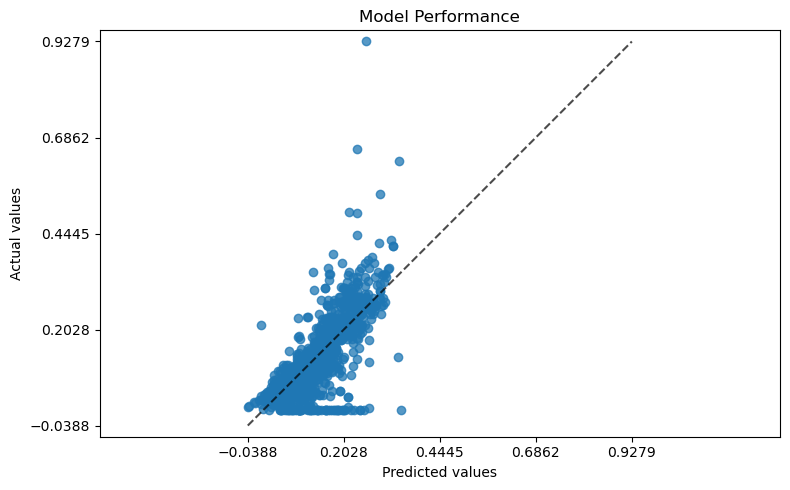

In [43]:
l_model_final, l_df = model_fit_summary(l_model, df_processed_2, 'price', 'LassoCV Model')

## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Model Selection

Based on RMSE as well as the other evaluation metrics, it appears that the **Random Forest Classifier** model is the best performing. From this, we can further analyze the model by extracting feature importance and understand how this affects the business. 

In [84]:
feature_names = [x for x in list(rf_df.columns) if x not in ['id']]
best_rf_model = rf_model_final.best_estimator_
importances = best_rf_model.feature_importances_

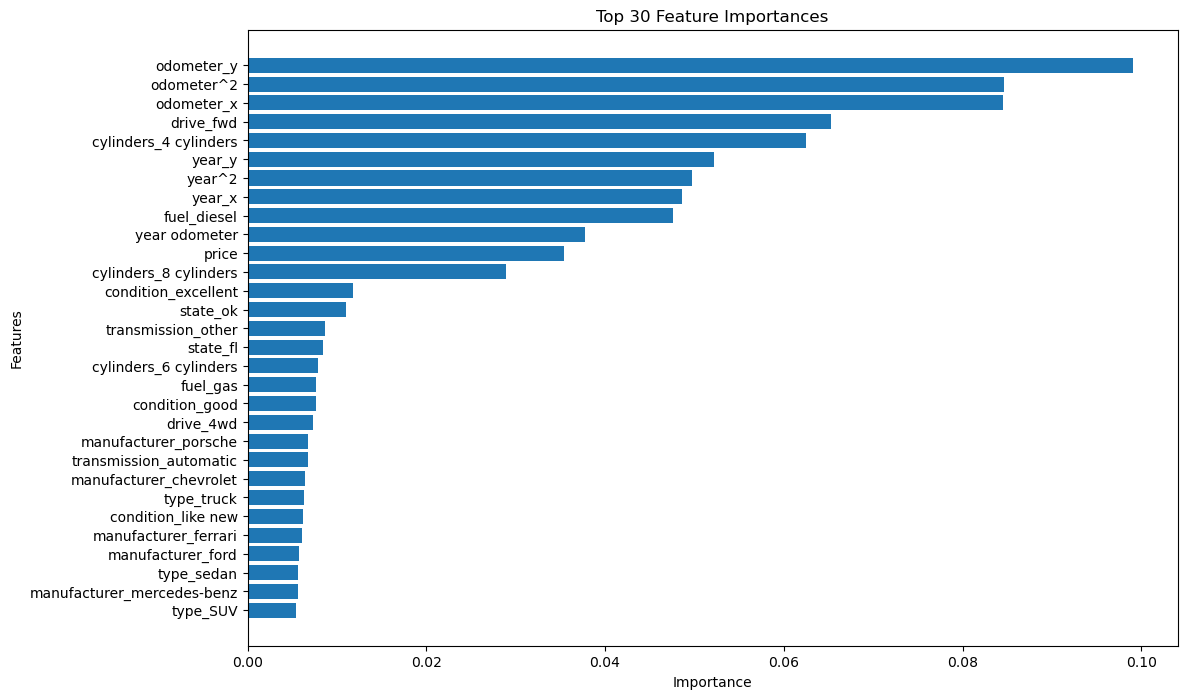

In [91]:
# # Map these importances to the corresponding feature names
feature_importances = pd.DataFrame(data={'Feature Name': feature_names,'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the most important features
features = 30
plt.figure(figsize=(12, 8))
plt.title(f"Top {features} Feature Importances")
plt.barh(feature_importances['Feature Name'][:features], feature_importances['Importance'][:features])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig(f'./images/report_images/feature_importances.png', bbox_inches="tight")
plt.show()    


From this chart, it appears that year and odometer have the biggest impact on the price followed by certain car features or quality which makes sense. It does appear the 4wd Diesel vehicles seem to break this trend and therefore maybe a car to target to improve sales

## Deployment

#### Intro, Business Needs, and Approach
This notebook details the analysis and modeling of used car sales. The goal of this exercise is to clearly understand the factors that influence the price of a used car. From these factors, we can clearly identify areas where we need to focus such as customer base, marketing, advertising, cars to regularly have in inventory, etc. 

The approach is outlined in the CRISP-DM method. The technical details of the method are not included in this report but more details can be found above in the notebook. For simplicity sake, data was gathered, cleaned, prepped, and modeled. Further analysis was completed on the final model. 

#### Findings
From my findings, it appears the year and odometer have the most profound impact on the price of a used car. This can be clearly seen in the charts below

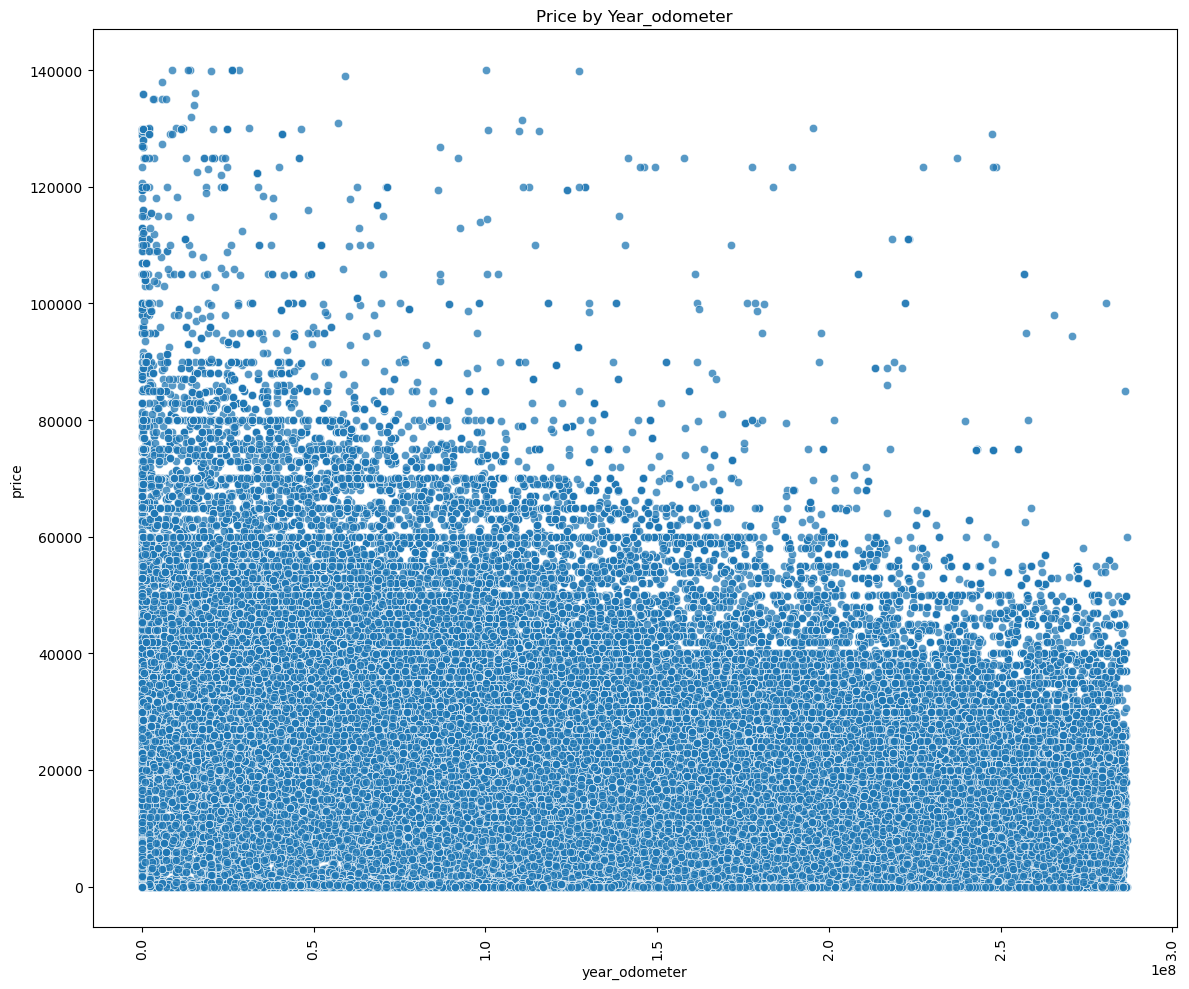

In [95]:
df_temp = df_processed_1.copy()
df_temp['year_odometer'] = df_temp['year'] * df_temp['odometer']
plot_numerical_vs_price(df_temp, 'year_odometer', 'price', raw_bool=False, display=True)

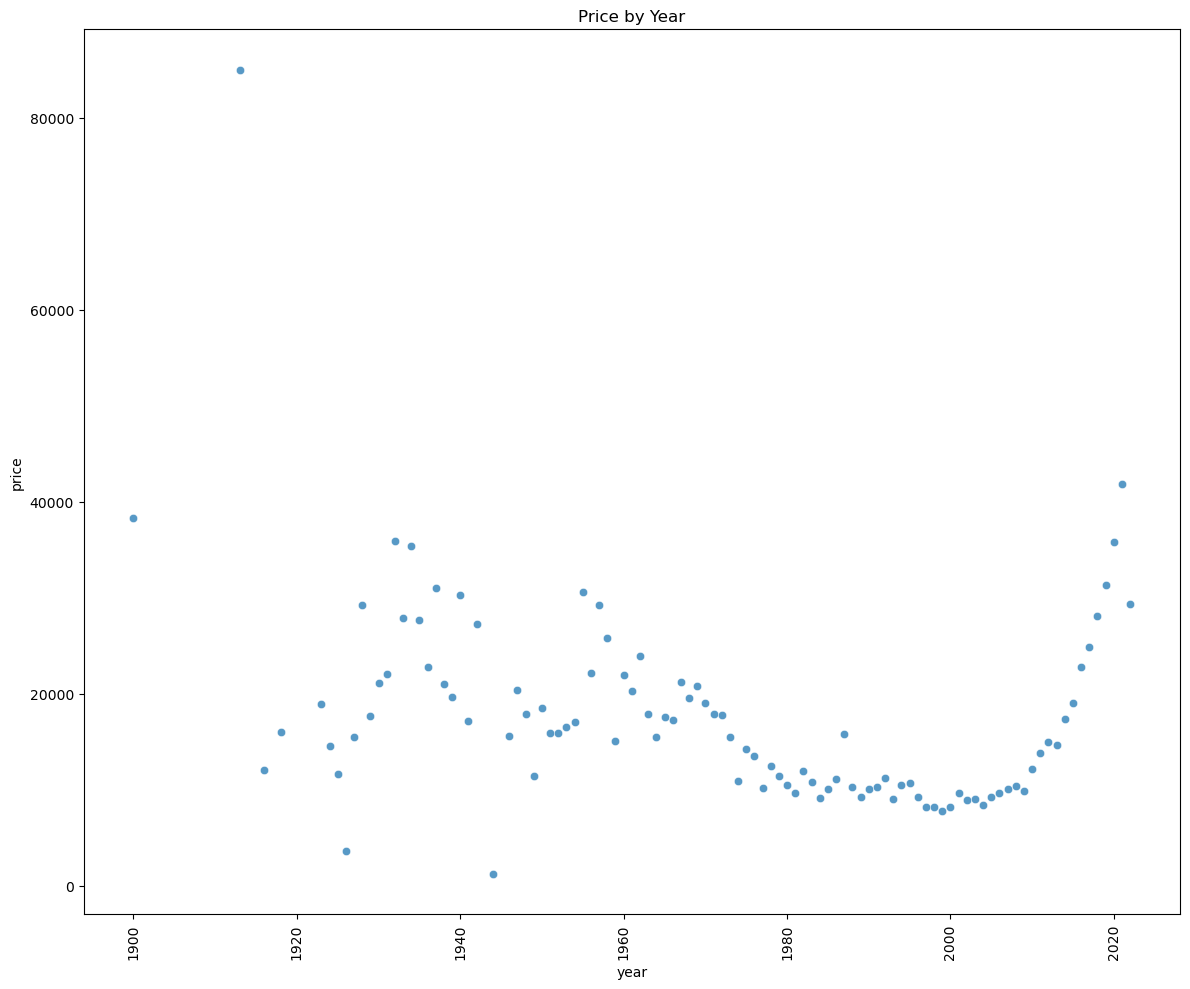

In [99]:
df_temp_2 = df_processed_2.copy()
# Average price per year
df_temp_2 = df_temp_2[['year', 'price', 'odometer']]
df_temp_2 = df_temp_2.groupby('year').mean().reset_index()
plot_numerical_vs_price(df_temp_2, 'year', 'price', raw_bool=False, display=True)

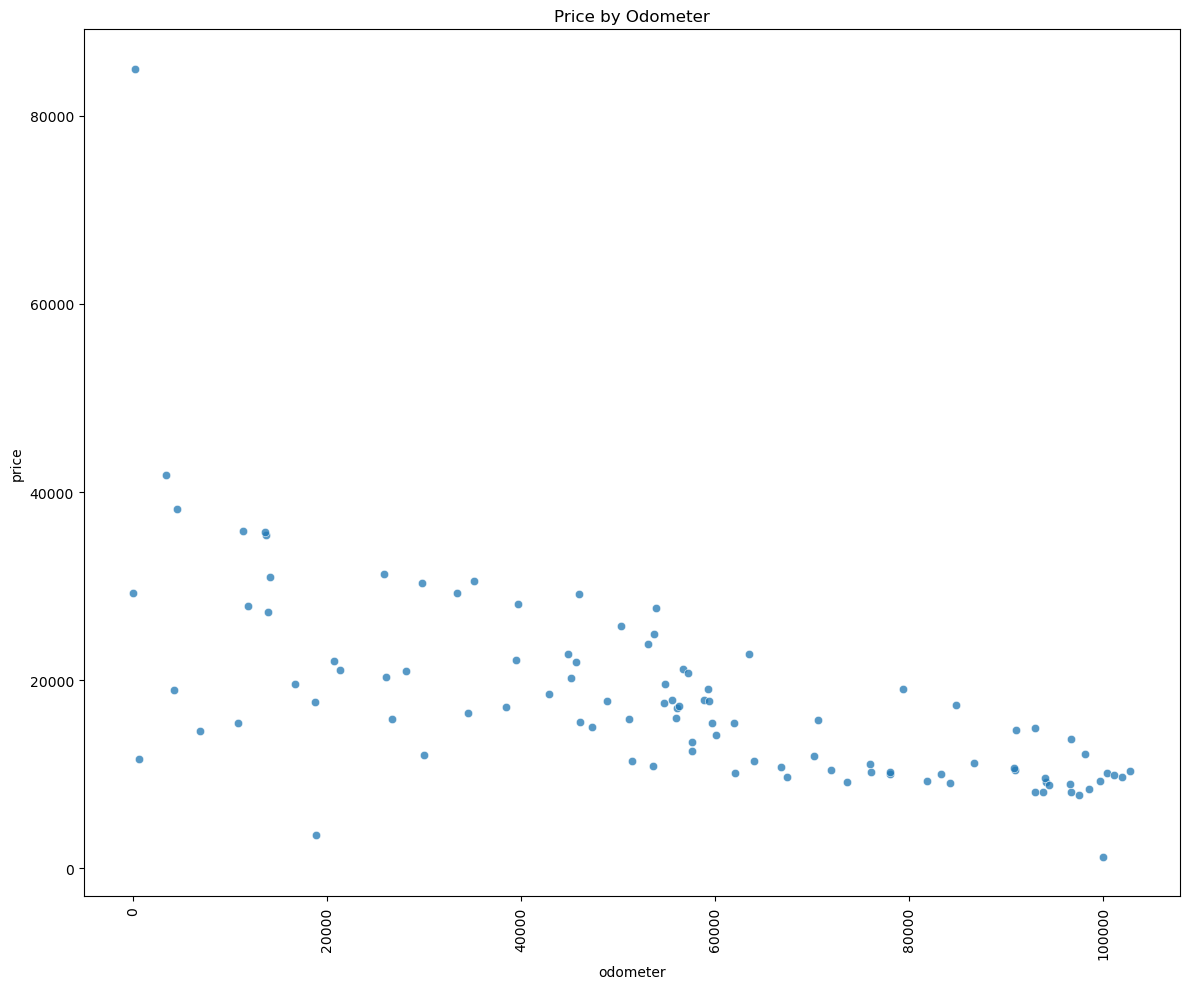

In [102]:
df_temp_2 = df_processed_2.copy()
# Average price per year
df_temp_2 = df_temp_2[['year', 'price', 'odometer']]
df_temp_2 = df_temp_2.groupby('year').mean().reset_index()
plot_numerical_vs_price(df_temp_2, 'odometer', 'price', raw_bool=False, display=True)

**NOTE**: Additional trends can be found above if more detail is needed

#### Next Steps and Action Items
- Based on these results, we analyze our current inventory and understand what is our predicted inventory value and use that as a benchmark moving forward. We should be focusing on the year and odometer
- We should understand which vehicles have the largest markup and then focus on those areas
- For those lower value cars, can we highlight features that are more desirable to consumers? 
- For those high-value cars, let's ensure that we meet our expectations from this report (if not exceed)
- Knowing our current stock on-hand, marketing should target the appropriate customer base and again highlight features that customers are looking for
- Sales teams should be equipped to discuss what's important to the customer and potentially work with them to target higher markup vehicles
- Teams that are focusing on restocking and/or inventory should only buy cars that maximize our profits (newer or classic cars with low odometer values)

#### Future Recommendations
- Capture sales and update model in near real time so our internal teams (including salesman) always have the most-up-to-date, accurate predictions
- Expand our data reach. We can join our internal data with other available datasets to further understand consumer patterns and insights
- Develop this solution as a self-service application ensuring all internal teams can easily access and explore data